In [1]:
from floater.generators import FloatSet
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
ds = open_mdsdataset('/data/scratch/rpa/global_lagrangian/run', iters=None, read_grid=True)

/home/cz2397/.local/lib/python2.7/site-packages/xmitgcm-0.2.0-py2.7.egg/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [3]:
lon = ds.XC.values
lat = ds.YC.values
land_mask = (ds.hFacC.values==1)

In [4]:
model_grid = {'lon': lon, 'lat': lat, 'land_mask': land_mask}

In [5]:
fs = FloatSet(xlim=(0, 360), ylim=(-80, 70), dx=0.03125, dy=0.03125, model_grid=model_grid)

In [6]:
fs.to_mitgcm_format('/home/cz2397/data/rclv-eddies/MITgcm_floats_32deg_64bit.bin', mesh='hex')

In [7]:
floats = np.fromfile('/home/cz2397/data/rclv-eddies/MITgcm_floats_32deg_64bit.bin', dtype='>f8')

In [8]:
ntot = len(floats)

In [9]:
floats.shape = (ntot/9, 9)

In [10]:
x = floats[:, 2]
y = floats[:, 3]

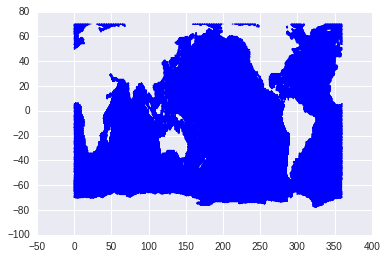

In [11]:
plt.scatter(x[::100], y[::100], edgecolor='none', s=1)